In [83]:
import numpy as py
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.layers import LayerNormalization
import tensorflow as tf
import time
import numba
start_time = time.time()


In [84]:
df = pd.read_csv('truths.csv')
df

,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,...,64_y,65_x,65_y,66_x,66_y,67_x,67_y,68_x,68_y,is_Truth
0,43,41,42,51,43,61,45,71,49,81,...,77,92,78,82,77,77,78,73,77,1
1,42,42,41,52,43,63,45,74,47,83,...,77,92,79,82,77,78,78,73,78,1
2,44,40,43,50,45,61,47,72,49,82,...,77,91,78,82,77,78,78,74,77,1
3,42,41,42,51,43,62,45,73,48,83,...,77,91,79,82,77,77,78,73,78,1
4,43,40,42,50,44,61,46,72,48,82,...,77,91,79,82,77,77,78,73,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,39,38,38,47,39,57,41,67,44,76,...,68,93,68,82,72,76,73,72,72,0
8443,39,38,39,47,39,57,41,68,44,77,...,68,93,68,82,71,77,73,72,72,0
8444,40,38,39,47,40,56,42,66,44,76,...,68,93,68,82,71,76,72,72,72,0
8445,40,39,39,48,40,57,42,67,44,76,...,68,92,68,82,71,77,72,72,72,0


In [85]:
dataset = df.values
dataset

array([[43, 41, 42, ..., 73, 77,  1],
       [42, 42, 41, ..., 73, 78,  1],
       [44, 40, 43, ..., 74, 77,  1],
       ...,
       [40, 38, 39, ..., 72, 72,  0],
       [40, 39, 39, ..., 72, 72,  0],
       [40, 37, 40, ..., 72, 72,  0]])

In [86]:
X = dataset[:,0:135]
Y = dataset[:,136]

In [87]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [88]:
X_scale


array([[0.47222222, 0.44444444, 0.45945946, ..., 0.45454545, 0.51219512,
        0.43181818],
       [0.44444444, 0.5       , 0.43243243, ..., 0.47727273, 0.51219512,
        0.43181818],
       [0.5       , 0.38888889, 0.48648649, ..., 0.47727273, 0.51219512,
        0.45454545],
       ...,
       [0.38888889, 0.27777778, 0.37837838, ..., 0.43181818, 0.36585366,
        0.40909091],
       [0.38888889, 0.33333333, 0.37837838, ..., 0.45454545, 0.36585366,
        0.40909091],
       [0.38888889, 0.22222222, 0.40540541, ..., 0.45454545, 0.36585366,
        0.40909091]])

In [89]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [90]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=1)

In [91]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(5912, 135) (2534, 135) (1, 135) (5912,) (2534,) (1,)


In [92]:
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models

from keras.layers import Dense
model = Sequential([ Dense(512, activation='leaky_relu', input_shape=(135,))
                    , Dense(512, activation='leaky_relu', input_shape=(135,))
                    , Dense(512, activation='leaky_relu', input_shape=(135,))
                    , Dense(512, activation='leaky_relu')
                    , Dense(1, activation='sigmoid'), ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train, Y_train, batch_size=64, epochs=3, validation_data=(X_val, Y_val))

Epoch 1/3
93/93 [==============================] - 2s 6ms/step - loss: 0.3343 - accuracy: 0.8195 - val_loss: 0.1878 - val_accuracy: 0.9357
Epoch 2/3
93/93 [==============================] - 0s 4ms/step - loss: 0.1739 - accuracy: 0.9252 - val_loss: 0.0795 - val_accuracy: 0.9716
Epoch 3/3
93/93 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9609 - val_loss: 0.0868 - val_accuracy: 0.9665


In [93]:
print(model.evaluate(X_train,Y_train)[1]*100,"%")
#100.0% accuracy 20k epochs
#96.43835425376892% accuracy 10k epochs
#91.78082346916199% accuracy 2k epochs
#92.05479621887207% accuracy 1k epochs
#84.93150472640991% accuracy 100 epochs
#52.054792642593384% accuracy 10 epochs

185/185 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9684
96.83694243431091 %


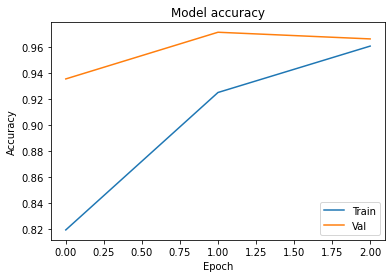

In [94]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [95]:
from keras.layers import Dropout
from keras import regularizers
reg = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(135,)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.1),
    Dense(1, activation='leaky_relu', kernel_regularizer=regularizers.l2(0.0001)),
])
reg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hreg = reg.fit(X_train, Y_train,
          batch_size=64, epochs=7,
          validation_data=(X_val, Y_val))


Epoch 1/7
93/93 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.8007 - val_loss: 0.3097 - val_accuracy: 0.8528
Epoch 2/7
93/93 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8451 - val_loss: 0.2747 - val_accuracy: 0.8990
Epoch 3/7
93/93 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.8809 - val_loss: 0.2102 - val_accuracy: 0.9006
Epoch 4/7
93/93 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9264 - val_loss: 0.1695 - val_accuracy: 0.9219
Epoch 5/7
93/93 [==============================] - 0s 2ms/step - loss: 1.7505 - accuracy: 0.7525 - val_loss: 0.4116 - val_accuracy: 0.8366
Epoch 6/7
93/93 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.8168 - val_loss: 0.2826 - val_accuracy: 0.8856
Epoch 7/7
93/93 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.8637 - val_loss: 0.2146 - val_accuracy: 0.9081


In [96]:
print(reg.evaluate(X_train,Y_train)[1]*100,"%")

185/185 [==============================] - 0s 690us/step - loss: 0.2064 - accuracy: 0.9141
91.40730500221252 %


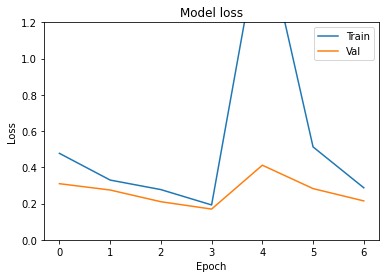

In [97]:
plt.plot(hreg.history['loss'])
plt.plot(hreg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [98]:
print("%s" % (time.time() - start_time))

5.119593143463135


In [99]:
import pickle

In [100]:
ds = pd.read_csv('https://raw.githubusercontent.com/Samin005/Lie-Detection-Using-Facial-Landmarks/master/data/Data_for_Lie_Detection%203.csv')
aa = ds.values

aX = aa[:,0:135]
aY = aa[:,136]
aX = min_max_scaler.fit_transform(aX)
predss = reg.predict(aX)

In [101]:
#predss
#aY
predsss = predss.astype(int)
#predsss
for i in predsss:
    if predsss[i]>=1:
        predsss[i]=1

import numpy as np
#predsss.shape

In [102]:
count = 0

for i in predsss:
    if predsss[i]==aY[i]:
        count = count + 1

totall = float(count/3601)
totall

1.0